<a href="https://colab.research.google.com/github/egonik-unlp/labo/blob/main/tasso/notebooks.procesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/egonik-unlp/labo.git
# ! cd labo && git pull

remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 2), reused 27 (delta 2), pack-reused 0
Unpacking objects: 100% (27/27), done.
From https://github.com/egonik-unlp/labo
   c31f935..db2b8f0  main       -> origin/main
Updating c31f935..db2b8f0
Fast-forward
 tasso/dia_2/Blanco Celulosa_0000.a2r |  Bin 0 -> 59280 bytes
 tasso/dia_2/Blanco Celulosa_0000.asp | 3602 ++++++++++++++++++++++++++++++++++
 tasso/dia_2/Blanco Celulosa_0000.spc |  Bin 0 -> 15135 bytes
 tasso/dia_2/Celulosa 2_0001.a2r      |  Bin 0 -> 59275 bytes
 tasso/dia_2/Celulosa 2_0001.asp      | 3602 ++++++++++++++++++++++++++++++++++
 tasso/dia_2/Celulosa 2_0001.spc      |  Bin 0 -> 15135 bytes
 tasso/dia_2/Celulosa 3_0000.a2r      |  Bin 0 -> 59275 bytes
 tasso/dia_2/Celulosa 3_0000.asp      | 3602 ++++++++++++++++++++++++++++++++++
 tasso/dia_2/Celulosa 3_0000.spc      |  Bin 0 -> 15125 bytes
 tasso/dia_2/Celulosa 4A_

In [7]:
!pip install agilentaspparser

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as s
import agilentaspparser as asp
plt.style.use('ggplot')


In [9]:
%cd /content/labo/tasso/dia_2
spectra = asp.load_dir('.').as_pandas()

spectra.to_csv('../../../datos_mariana_tasso.csv') 

/content/labo/tasso/dia_2


In [10]:
peaks_alles = {}

In [11]:
spectra.rename(columns = {'Blanco Celulosa_0000':'referencia'}, inplace=True)

In [12]:
ref = spectra.pop('referencia')


In [13]:
spectra.shape[1]

6

In [14]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size":18})

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


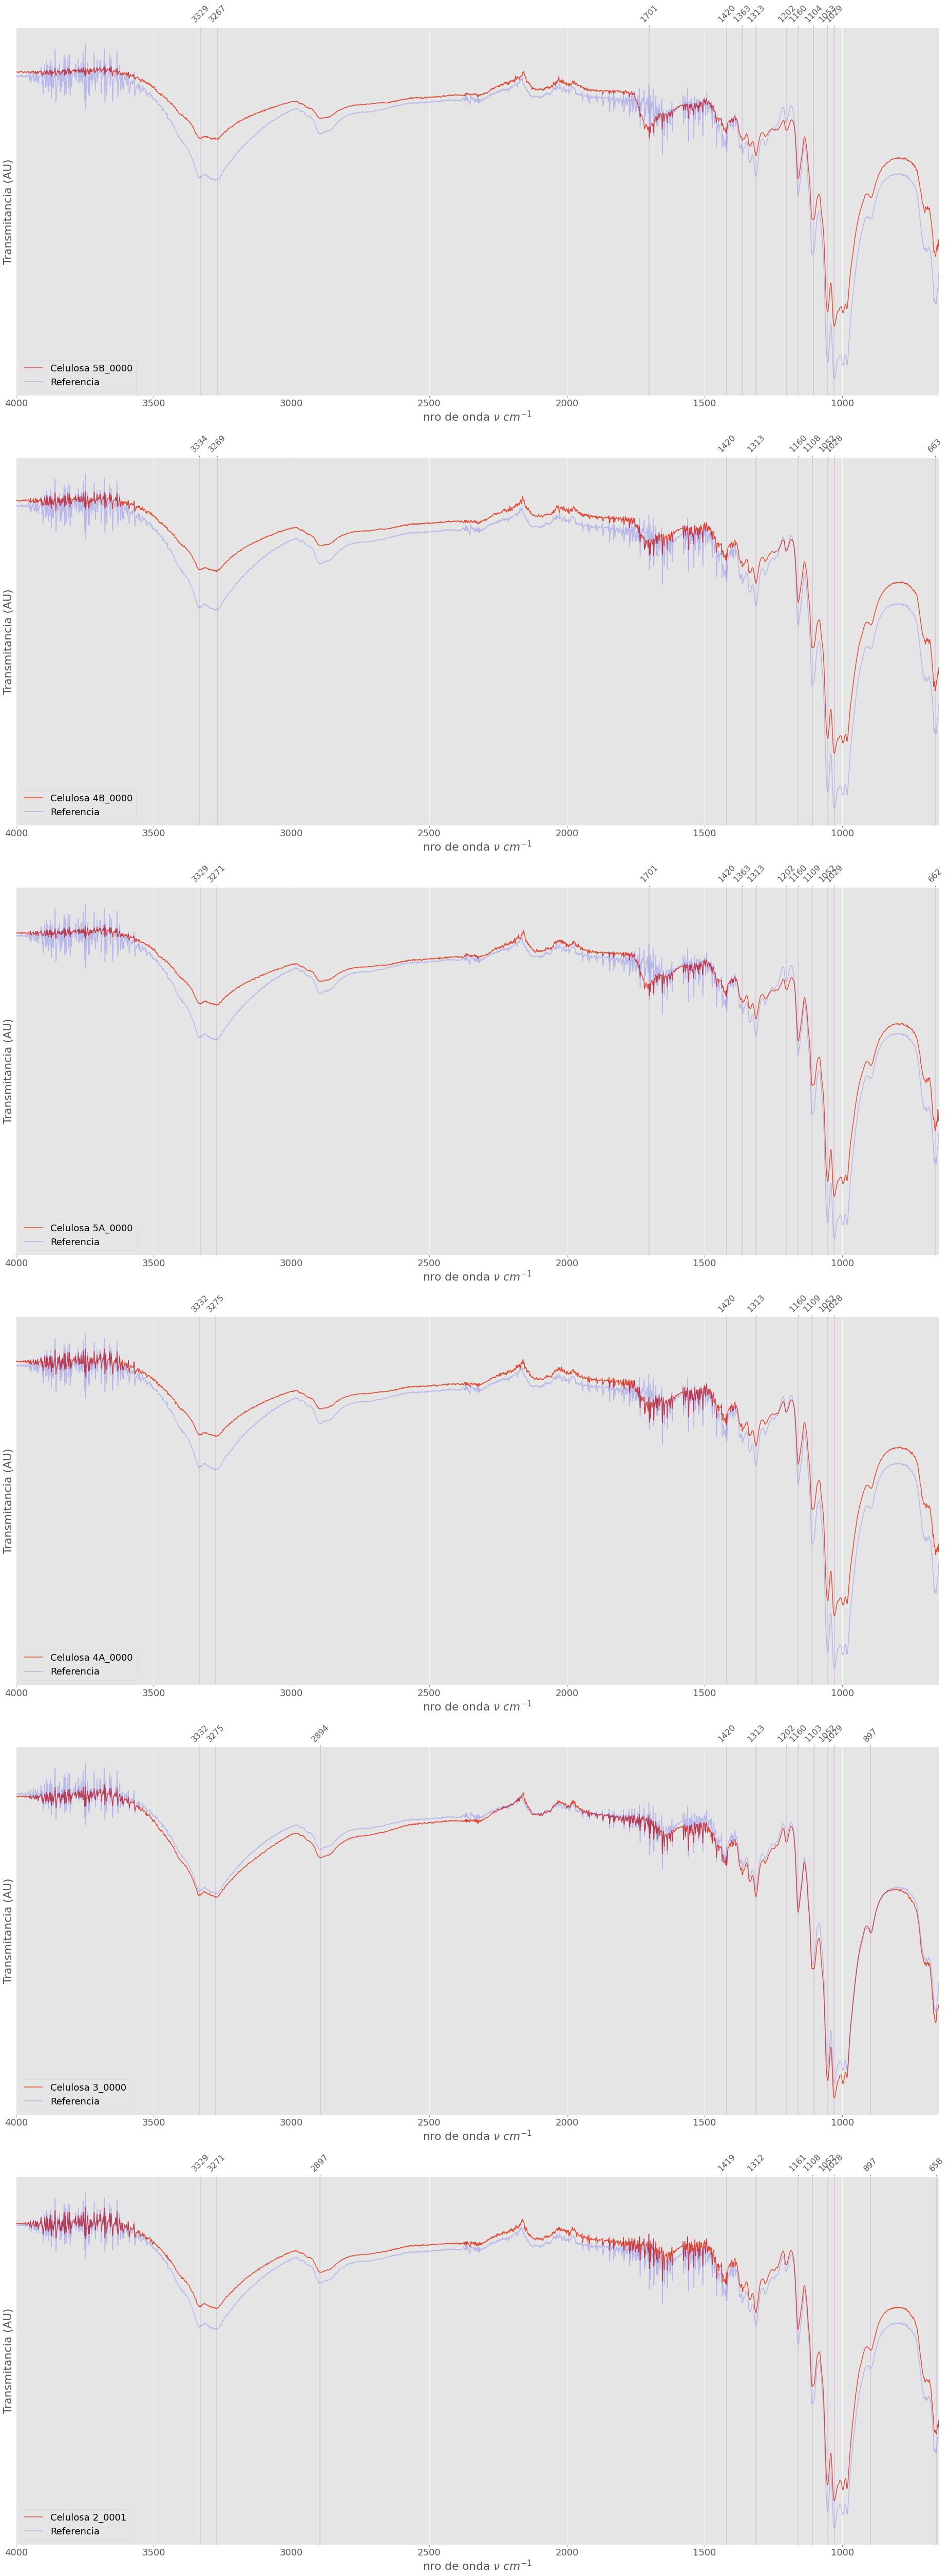

In [15]:
fig, ax = plt.subplots(spectra.shape[1],1, figsize = (26,70))
ax = ax.flatten()

for n,spectrum in enumerate(spectra):
  peaks = s.find_peaks(100- spectra[spectrum].values, height = 5, width = 12)[0]
  ax[n].plot(spectra[spectrum], label = spectrum)
  ax[n].plot(ref, c = 'b', alpha = .2, label = 'Referencia')
  ax[n].set_xlabel(r'nro de onda $\nu$ $cm^{-1}$')
  ax[n].set_ylabel('Transmitancia (AU)')
  ax[n].set_yticks([])
  ax[n].legend()
  for nu in spectra[spectrum].iloc[peaks].index:
    ax[n].axvline(nu, color = 'purple', alpha = .15)
  ax[n].set_xlim(4000,650)
  sax = ax[n].secondary_xaxis('top')
  sax.set_xticks(spectra[spectrum].iloc[peaks].index)
  sax.set_xticklabels(spectra[spectrum].iloc[peaks].index.astype(int), rotation = 45, fontsize = 16)
  peaks_alles[spectrum] = list(peaks)
plt.savefig('../../../graficos_mariana_tasso.png')
plt.tight_layout()
plt.show()